In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

file_names = []
T = []
Ea = []
file_times = []
data_two = []
data_three = []
peak_two = []
peak_three = []
peak_two_time = []
peak_three_time = []

def load_data(path):
    files = os.listdir(path)

    for file in files:
        if file.find('.txt') != -1:
            file_names.append(file)
            temperature = int(file[file.find('T=') + 2: file.find('Ea=') - 1])
            energy = float(file[file.find('Ea=') + 3: file.find('f=') - 1])
            T.append(temperature)
            Ea.append(energy)

    file_num = len(file_names)

    for i in range(file_num):
        data = pd.read_csv(path + '/' + file_names[i], sep='\t')
        time = data['time']
        second = data['2']
        third = data['3']
        second_peak = data['2'].idxmax()
        third_peak = data['3'].idxmax()
        data_two.append(second)
        data_three.append(third)
        file_times.append(time)
        peak_two.append(data['2'][second_peak])
        peak_three.append(data['3'][third_peak])
        peak_two_time.append(data['time'][second_peak])
        peak_three_time.append(data['time'][third_peak])

In [8]:
load_data('/Users/jiguanhua/Desktop/chemistry lab/number of seeds')

In [9]:
import numpy as np
import math
peak_two_time_numpy = np.array(peak_two_time)
peak_two_time_log = np.log10(peak_two_time_numpy)
peak_three_time_numpy = np.array(peak_three_time)
peak_three_time_log = np.log10(peak_three_time_numpy)
T_Ea = np.multiply(T, Ea)
T_numpy = np.array(T)
Ea_numpy = np.array(Ea)

In [10]:
print(peak_two_time_numpy)
print(10 ** peak_two_time_log)

[2.37662770e-09 5.57597744e-02 1.41926295e+20 8.66197512e-06
 4.99304555e+09 4.50642532e-01 7.38727605e-04 1.04258855e+00
 2.75818033e+00 6.47189496e+00 1.10889207e-04 4.87224228e-01
 1.10398182e+02 1.25282850e-09 9.78940545e-01 2.07844024e+21
 1.49104997e-06 4.07216990e+08 4.57342849e-01 3.60612472e+00
 7.57110441e-07 4.64208107e+03 8.93848076e+07 9.94025520e-09
 1.02866176e+11 3.55004567e+18 2.46102115e-03 1.41800134e-07
 1.29195570e-09 1.30122833e+10 2.19890300e-08 3.58363354e+11
 6.65858491e+17 2.57088151e-04 2.31273667e-07 7.85606337e+10
 8.67789665e-02 1.03937691e+01 8.90626244e-06 5.19190367e+02
 1.09318303e+07 7.27235563e+03 1.88449298e+21 2.07109617e+16
 5.22894414e+11 2.81256207e+11 4.19055546e+10 1.03020000e-12
 3.15666055e+03 3.88406206e-01 4.29808425e+02 1.57424214e+09
 3.12291014e+04 4.41090882e+00 5.84445319e+03 1.22140690e-06
 4.14512673e+04 7.52079085e+19 1.45786850e+15 5.06106842e+10
 3.92506741e+12 2.35957465e-02 8.09767582e-08 7.87329226e+05
 2.71930420e+02 1.417308

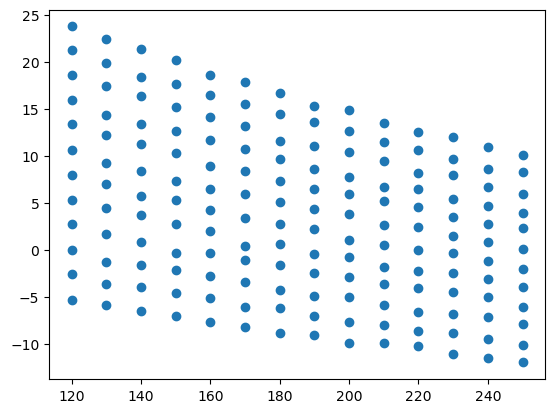

In [11]:
plt.scatter(T_numpy, peak_two_time_log)

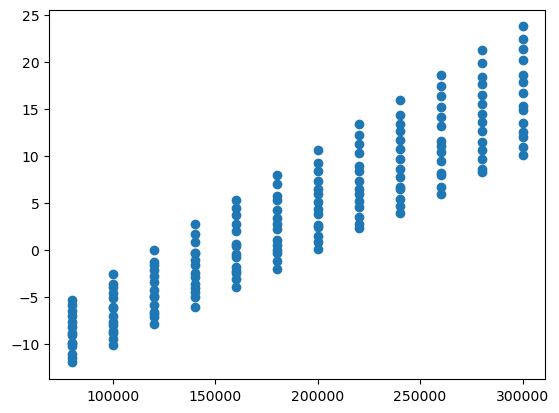

In [12]:
plt.scatter(Ea_numpy, peak_two_time_log)

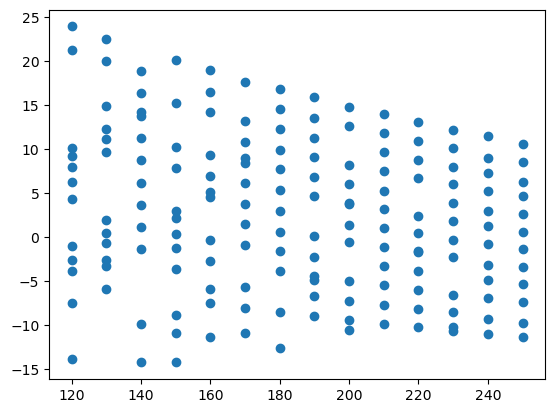

In [13]:
plt.scatter(T_numpy, peak_three_time_log)

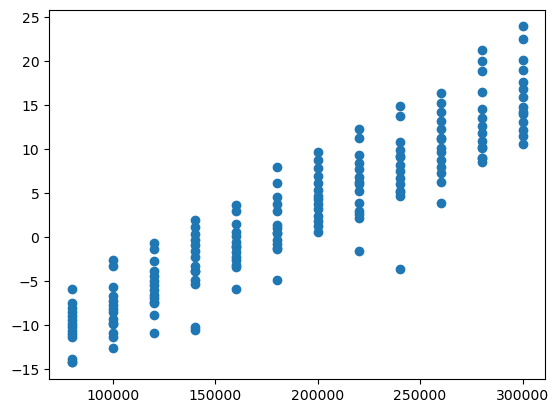

In [14]:
plt.scatter(Ea_numpy, peak_three_time_log)

In [50]:
input_numpy = np.array([T_numpy, Ea_numpy])
input_numpy = input_numpy.T

In [125]:
import torch
import torch.nn as nn
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

input_dim = 2
output_dim = 1

#train a model that predict peak for 2
model_two = LinearRegressionModel(input_dim, output_dim)
epochs = 20000
learning_rate = 0.01
optimizer = torch.optim.Adam(model_two.parameters(), lr = learning_rate)
criterion = nn.MSELoss()


for epoch in range(epochs):
    epoch += 1
    inputs = torch.from_numpy(input_numpy).to(torch.float32)
    labels = torch.from_numpy(peak_two_time_log).to(torch.float32)
    
    optimizer.zero_grad()
    
    outputs = model_two(inputs)
    
    loss = criterion(outputs, labels)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 1000 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

torch.save(model_two.state_dict(), 'model_two.pkl')

epoch 1000, loss 2107.492919921875
epoch 2000, loss 2003.3502197265625
epoch 3000, loss 1829.661376953125
epoch 4000, loss 1570.11376953125
epoch 5000, loss 1220.0460205078125
epoch 6000, loss 810.945556640625
epoch 7000, loss 429.0013427734375
epoch 8000, loss 179.9021759033203
epoch 9000, loss 87.9874496459961
epoch 10000, loss 74.0897445678711
epoch 11000, loss 73.56598663330078
epoch 12000, loss 73.55953216552734
epoch 13000, loss 73.55394744873047
epoch 14000, loss 73.54843139648438
epoch 15000, loss 244.04771423339844
epoch 16000, loss 73.54264831542969
epoch 17000, loss 73.53240966796875
epoch 18000, loss 73.52714538574219
epoch 19000, loss 341.02703857421875
epoch 20000, loss 73.53030395507812


In [126]:
#train a model that predict peak for 3
model_three = LinearRegressionModel(input_dim, output_dim)
epochs = 20000
learning_rate = 0.01
optimizer = torch.optim.Adam(model_three.parameters(), lr = learning_rate)
criterion = nn.MSELoss()

for epoch in range(epochs):
    epoch += 1
    inputs = torch.from_numpy(input_numpy).to(torch.float32)
    labels = torch.from_numpy(peak_three_time_log).to(torch.float32)
    
    optimizer.zero_grad()
    
    outputs = model_three(inputs)
    
    loss = criterion(outputs, labels)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 1000 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1000, loss 2114.27099609375
epoch 2000, loss 1837.6646728515625
epoch 3000, loss 1431.99267578125
epoch 4000, loss 945.993896484375
epoch 5000, loss 491.5324401855469
epoch 6000, loss 198.88279724121094
epoch 7000, loss 93.7311782836914
epoch 8000, loss 78.52377319335938
epoch 9000, loss 77.99185943603516
epoch 10000, loss 77.9883041381836
epoch 11000, loss 77.9862289428711
epoch 12000, loss 77.98470306396484
epoch 13000, loss 107.19595336914062
epoch 14000, loss 77.9876937866211
epoch 15000, loss 77.97821044921875
epoch 16000, loss 77.97623443603516
epoch 17000, loss 77.97430419921875
epoch 18000, loss 9385.5810546875
epoch 19000, loss 77.98008728027344
epoch 20000, loss 77.96868133544922
